<a href="https://colab.research.google.com/github/ugursevcan/Kaggle-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u><b>Bike Sharing Demand</b></u></h1></center>

<h2><b>Table of Contents</b></h2>

* 1 INTRODUCTION
  * 1.1 Overview   
  * 1.2  Feature Description
  * 1.3  Problem Statement
  * 1.4  Data Set Overview
      * 1.4.1  Importing Necessary Libraries
      * 1.4.2  Shape of the Data
      * 1.4.3  First Few Observations
      * 1.4.4  Feature Data Types
      * 1.4.5  Feature Statistics Summary

* 2 EDA
  * 2.1  Data Distribution Visualization - Part 1
      * 2.1.1  Distribution vs. Weather, Season, Working Day, Holiday
      * 2.1.2  Distribution vs. Temperature
  * 2.2  Feature Engineering - Part 1
      * 2.2.1 Converting "datetime" Column
      * 2.2.2 Reordering Columns
  * 2.3  Data Distribution Visualization - Part 2
      * 2.3.1  Hourly Distribution
      * 2.3.2  Monthly Distribution
  * 2.4  Outliers Analysis
      * 2.4.1  Count
      * 2.4.2  Eliminate Possible Outliers
  * 2.5  Correlation Analysis
      * 2.5.1  Regression Plots vs. Temperature, Humidity and Windspeed
      * 2.5.2  Heatmap Plot
  * 2.6  Feature Engineering - Part 2
      * 2.6.1  Dropping Columns (casual and registered)
      * 2.6.2  Weather Conversion
      * 2.6.3  Creating Dummy Variables

* 3 MODELLING
  * 3.1 Scaling Numeric Values
  * 3.2 Train/Validation Split
  * 3.3 Defining Metric
  * 3.4 Model Selection
  * 3.5 Feature Importance
  * 3.6 Submission
  
* 4 SUMMARY AND CONCLUSIONS
  * 4.1  Data Exploration Conclusions
  * 4.2  Limitations and Scope for Future Work

# **1 INTRODUCTION**

## **1.1 Overview**
Kaggle competition: https://www.kaggle.com/c/bike-sharing-demand

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.



## **1.2 Feature Description**
The data set available at (https://www.kaggle.com/c/bike-sharing-demand/data) comprises of two spreadsheets - train.csv, which contains data to train the prediction algorithm, and test.csv, which contains data to test the prediction algorithm. The fields of data in train.csv are listed below.

* <u><b>datetime:</b></u> hourly date + timestamp
* <u><b>season:</b></u> 1 = spring, 2 = summer, 3 = fall, 4 = winter 
* <u><b>holiday:</b></u> whether the day is considered a holiday
* <u><b>workingday:</b></u> whether the day is neither a weekend nor holiday
* <u><b>weather:</b></u> 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* <u><b>temp:</b></u> temperature in Celsius
* <u><b>atemp:</b></u> "feels like" temperature in Celsius
* <u><b>humidity:</b></u> relative humidity
* <u><b>windspeed:</b></u> wind speed
* <u><b>casual:</b></u> number of non-registered user rentals initiated
* <u><b>registered:</b></u> number of registered user rentals initiated
count - number of total rentals

## **1.3 Problem Statement**

The objective of this project is to integrate historical bike usage patterns with weather data to predict bike rental demand.

* The target column to be predicted is 'count'
* Eight input columns are utilized as variables: 'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', and 'windspeed'. 
* The remaining two columns, 'casual' and 'registered', represent the breakdown of the 'count' target column.

## **1.4 Data Overview**

### **1.4.1  Importing Necessary Libraries**


In [1]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the data:
raw_train_data = pd.read_csv('/content/drive/MyDrive/Bike-Sharing-Demand-Prediction/train.csv')
raw_test_data = pd.read_csv('/content/drive/MyDrive/Bike-Sharing-Demand-Prediction/test.csv')

### **1.4.2  Shape of the Data**


In [4]:
print('shape of the data: ', raw_train_data.shape)

shape of the data:  (10886, 12)


The data contains more than 10,000 observations and consists of 12 columns.

### **1.4.3  First Few Observations**


In [5]:
raw_train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
raw_test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### **1.4.4 Feature Data Types**

In [7]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Based on the output of the .info() command above, we can see that there are no missing values in any of the 10886 rows of the dataset. This suggests that the dataset is complete and clean.





### **1.4.5 Feature Statistics Summary**

In [8]:
raw_train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
print('Casual + Registered = Count? ', ~(raw_train_data.casual + raw_train_data.registered - raw_train_data['count']).any())

Casual + Registered = Count?  True


# **2 EDA**

## **2.1  Data Distribution Visualization - Part 1**

### **2.1.1 Distribution vs. Season, Holiday, Working Day, Weather**

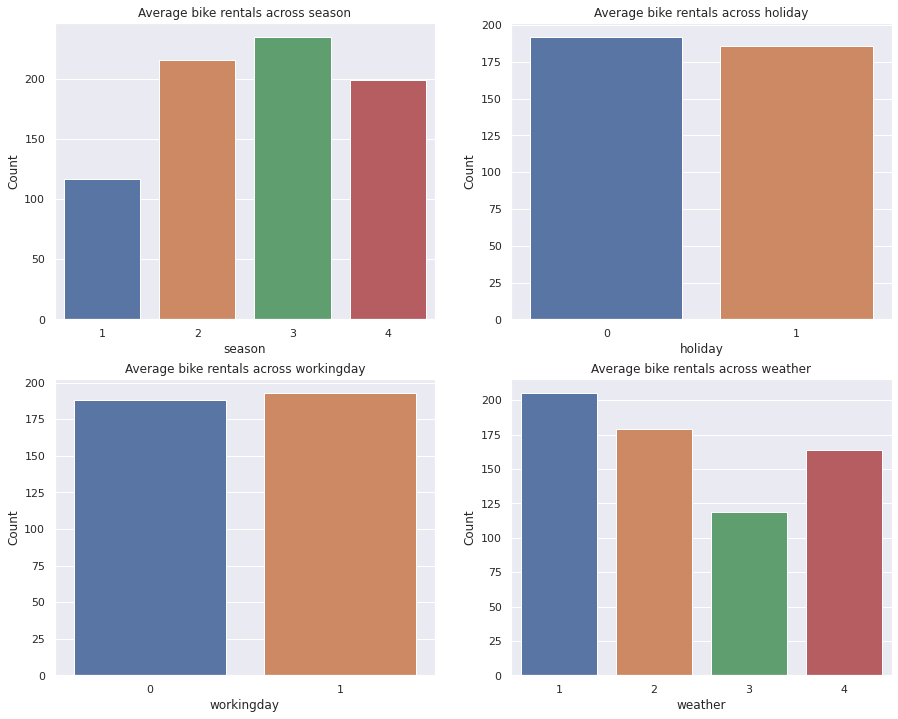

In [10]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(raw_train_data.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='season', y='count', ax=axes)
axes.set(xlabel='season', ylabel='Count', title='Average bike rentals across season')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(raw_train_data.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='holiday', ylabel='Count', title='Average bike rentals across holiday')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(raw_train_data.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='workingday', ylabel='Count', title='Average bike rentals across workingday')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(raw_train_data.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='weather', y='count', ax=axes)
axes.set(xlabel='weather', ylabel='Count', title='Average bike rentals across weather')
plt.show()

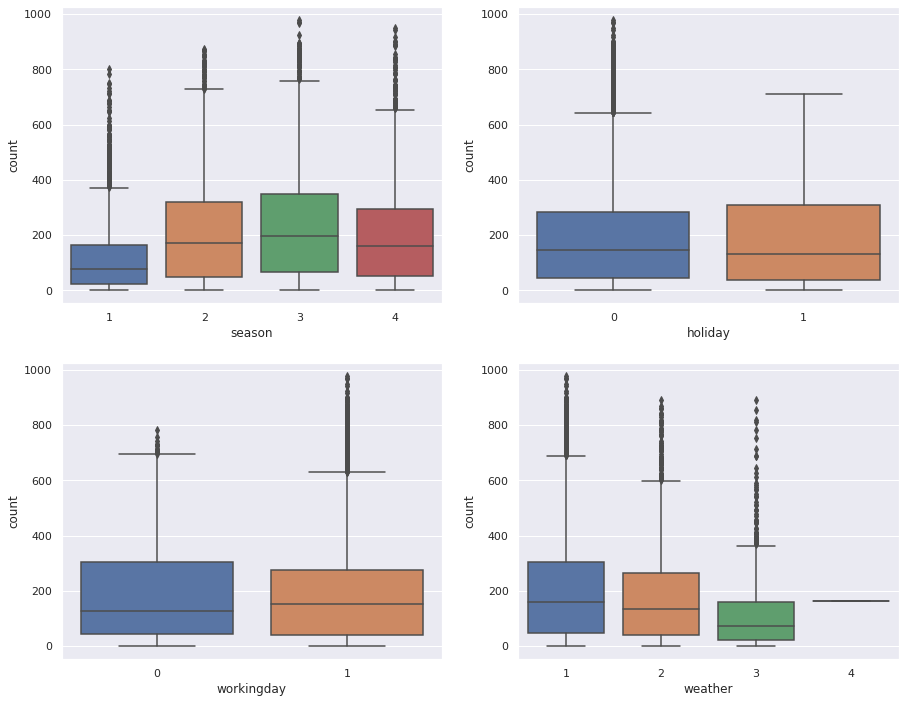

In [11]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(data=raw_train_data, y='count', x='season', ax=axes[0][0])
sns.boxplot(data=raw_train_data, y='count', x='holiday', ax=axes[0][1])
sns.boxplot(data=raw_train_data, y='count', x='workingday', ax=axes[1][0])
sns.boxplot(data=raw_train_data, y='count', x='weather', ax=axes[1][1])

plt.show()

### **2.1.2 Distribution vs. Temperature**

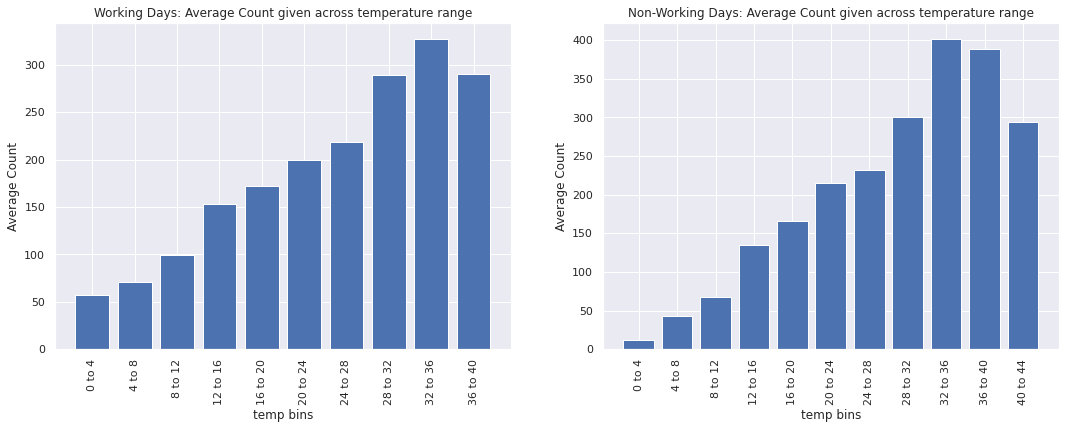

In [12]:
# Splitting data into working-day and non-working day
data_w = raw_train_data[raw_train_data.workingday==1]
data_nw = raw_train_data[raw_train_data.workingday==0]

bin_size = 4
data_w['temp_round'] = data_w['temp']//bin_size
data_nw['temp_round'] = data_nw['temp']//bin_size

mean_count_vs_temp_w = data_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = data_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show()

## **2.2  Feature Engineering - Part 1**

### **2.2.1 Converting "datetime" Column**

We'll convert datetime column to each elements (year, month, dayofweek, hour)

In [13]:
# Range of time stamp
first_date = raw_train_data['datetime'].min()
last_date = raw_train_data['datetime'].max()
print(first_date)
print(last_date)

2011-01-01 00:00:00
2012-12-19 23:00:00


In [14]:
type(raw_train_data['datetime'][0])

str

In [15]:
# Convert datetime column to each elements (year, month, dayofweek, hour)

raw_train_data['datetime']=pd.to_datetime(raw_train_data['datetime'])
raw_test_data['datetime']=pd.to_datetime(raw_test_data['datetime'])

def split_datetime(df):
    df['year']=df['datetime'].apply(lambda t: t.year)
    df['month']=df['datetime'].apply(lambda t: t.month)
    df['dayofweek']=df['datetime'].apply(lambda t: t.dayofweek)
    df['hour']=df['datetime'].apply(lambda t: t.hour)
    df=df.drop(['datetime'], axis=1)
    return df
    
train_data=split_datetime(raw_train_data)
test_data=split_datetime(raw_test_data)
    
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [16]:
test_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


### **2.2.2 Reordering Columns**

Reordering train_data columns

In [17]:
train_data.columns.values

array(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'dayofweek', 'hour'], dtype=object)

In [18]:
train_column_names_reordered = ['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count']

In [19]:
train_data_ordered = train_data[train_column_names_reordered]
train_data_ordered.head()

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,5,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,5,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,5,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,5,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Reordering test_data columns

In [20]:
test_data.columns.values

array(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'dayofweek', 'hour'],
      dtype=object)

In [21]:
test_column_names_reordered = ['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed']

In [22]:
test_data_ordered = test_data[test_column_names_reordered]
test_data_ordered.head()

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,3,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,3,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,3,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,3,4,1,0,1,1,10.66,12.880,56,11.0014


## **2.3  Data Distribution Visualization - Part 2**

### **2.3.1 Hourly Distribution**

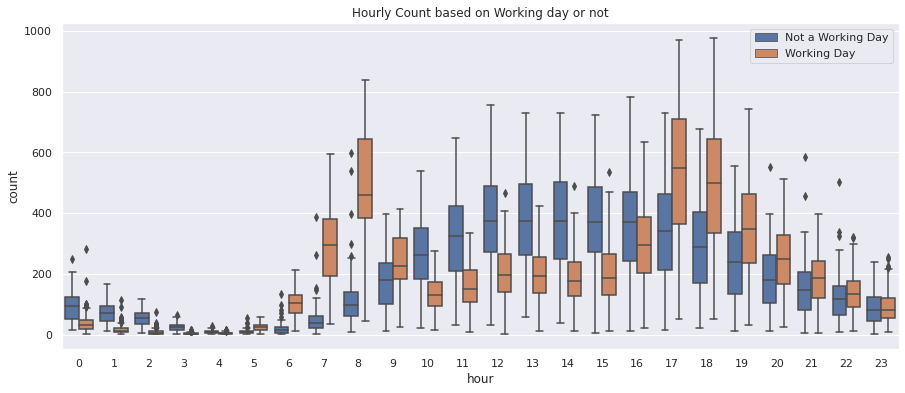

In [23]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=train_data_ordered, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()


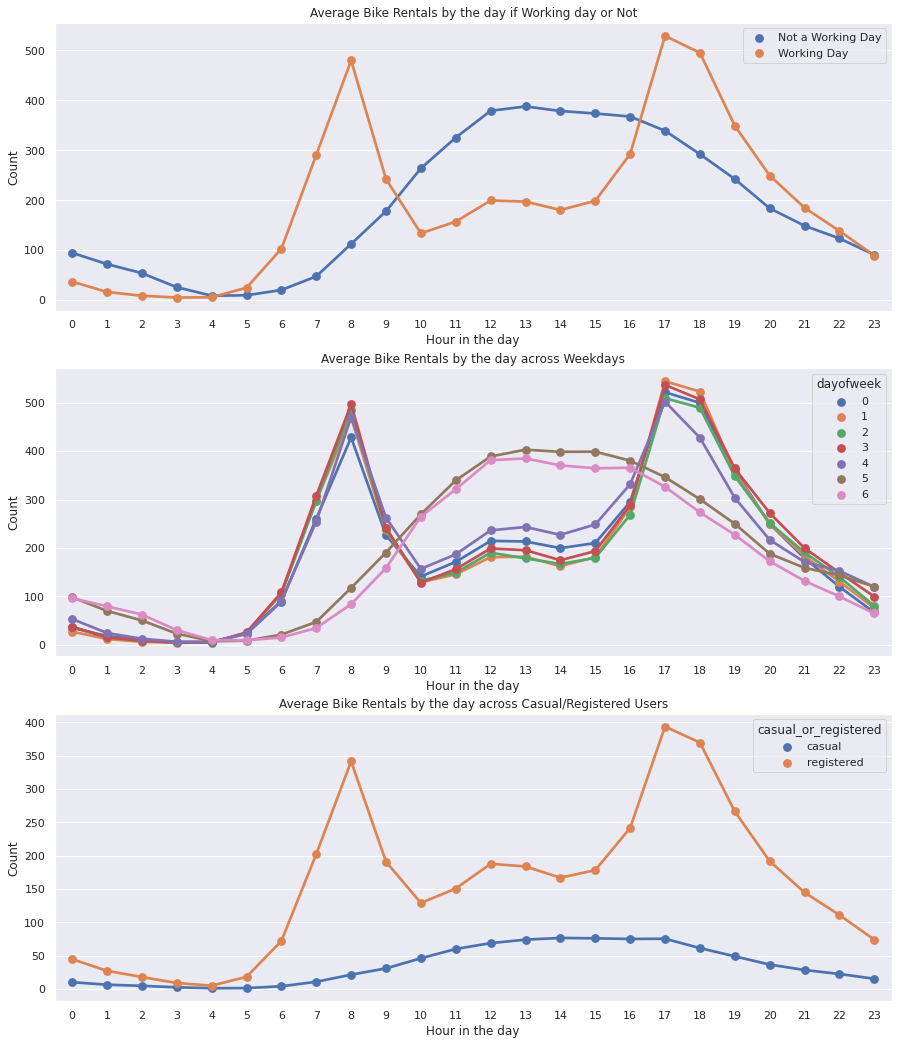

In [24]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(train_data_ordered.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= [0, 1, 2, 3, 4, 5, 6]
group_day_hour = pd.DataFrame(train_data_ordered.groupby(['dayofweek', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='count', hue='dayofweek', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')

df_melt = pd.melt(frame=train_data_ordered, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Casual/Registered Users')

plt.show()

### **2.3.2 Monthly Distribution**

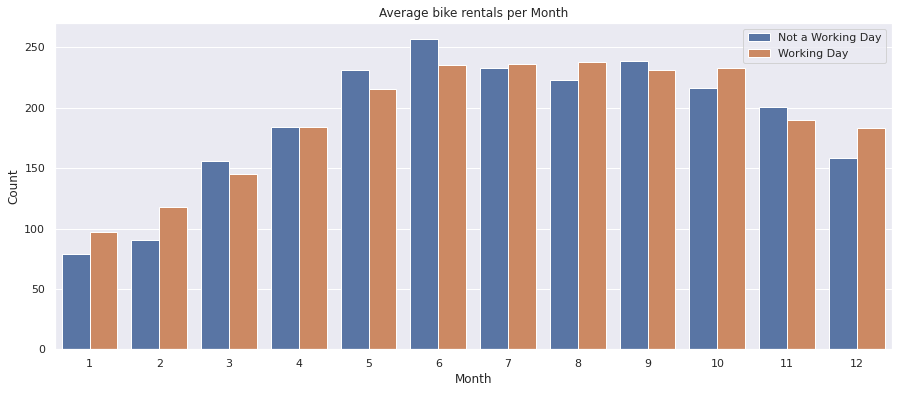

In [25]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(train_data_ordered.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

## **2.4  Outliers Analysis**

### **2.4.1 Count**

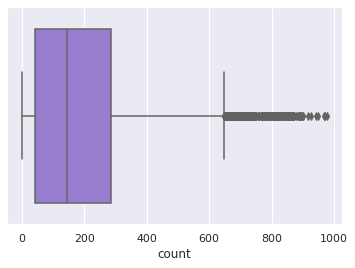

In [26]:
#boxplot of count
sns.boxplot(x='count',data=train_data_ordered,color='mediumpurple')
plt.show()

<Axes: xlabel='count', ylabel='Density'>

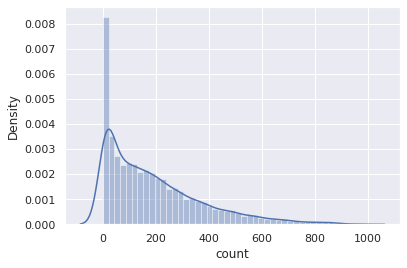

In [27]:
# Histogram of count
sns.distplot(train_data_ordered['count'])

In [28]:
# Transforming 'count' with a log transformation
train_data_ordered['count'] = np.log1p(train_data_ordered['count'])

In [29]:
# Eliminate outliers

train_data_ordered = train_data_ordered[np.abs(train_data_ordered['count'])-train_data_ordered['count'].mean() <=(3*train_data_ordered['count'].std())]
train_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10886 non-null  int64  
 1   month       10886 non-null  int64  
 2   dayofweek   10886 non-null  int64  
 3   hour        10886 non-null  int64  
 4   season      10886 non-null  int64  
 5   holiday     10886 non-null  int64  
 6   workingday  10886 non-null  int64  
 7   weather     10886 non-null  int64  
 8   temp        10886 non-null  float64
 9   atemp       10886 non-null  float64
 10  humidity    10886 non-null  int64  
 11  windspeed   10886 non-null  float64
 12  casual      10886 non-null  int64  
 13  registered  10886 non-null  int64  
 14  count       10886 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 1.3 MB


### **2.4.2 Eliminate Possible Outliers ('atemp', 'temp', 'windspeed', 'humidity')**

In [30]:
possible_outlier_cols = ['atemp', 'temp', 'windspeed', 'humidity'] 
possible_outlier_cols

['atemp', 'temp', 'windspeed', 'humidity']

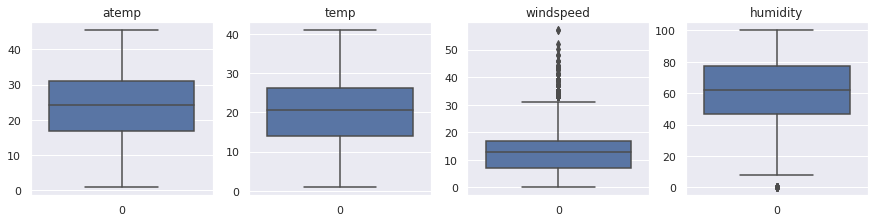

In [31]:
#Creating a boxplot to detect columns with outliers

plt.figure(figsize=(15,7))

for index,item in enumerate(possible_outlier_cols):
    ax = plt.subplot(2, 4, index+1)
    sns.boxplot(train_data_ordered[item], ax=ax)
    ax.set_title(item)

In [32]:
#Finding the inter-quartile range for the columns with outliers
Q1 = train_data_ordered[possible_outlier_cols].quantile(0.25)
Q3 = train_data_ordered[possible_outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

atemp        14.3950
temp         12.3000
windspeed     9.9964
humidity     30.0000
dtype: float64

In [33]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [34]:
#Detecting and removing the outliers
train_data_ordered[possible_outlier_cols] = train_data_ordered[possible_outlier_cols][~((train_data_ordered[possible_outlier_cols] < l_fence) | (train_data_ordered[possible_outlier_cols] > u_fence))]

In [35]:
#Checking the number of outliers deleted
train_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10886 non-null  int64  
 1   month       10886 non-null  int64  
 2   dayofweek   10886 non-null  int64  
 3   hour        10886 non-null  int64  
 4   season      10886 non-null  int64  
 5   holiday     10886 non-null  int64  
 6   workingday  10886 non-null  int64  
 7   weather     10886 non-null  int64  
 8   temp        10886 non-null  float64
 9   atemp       10886 non-null  float64
 10  humidity    10864 non-null  float64
 11  windspeed   10659 non-null  float64
 12  casual      10886 non-null  int64  
 13  registered  10886 non-null  int64  
 14  count       10886 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 1.6 MB


As a result of removing outliers, four columns now contain null values. We have two options: either delete the observations with null values or replace them with meaningful values. I will opt for the latter and replace the null values with the median value of each column instead of the mean, as mean is more sensitive to outliers, while the median is not.

In [36]:
#Creating a function to impute the null values created by outlier handling
def impute_null(possible_outlier_cols):
  for col in possible_outlier_cols:
    train_data_ordered[col].fillna(train_data_ordered[col].median(),inplace=True)

In [37]:
#Calling the imputing function
impute_null(possible_outlier_cols)

In [38]:
#Checking if the imputation is successful
train_data_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10886 non-null  int64  
 1   month       10886 non-null  int64  
 2   dayofweek   10886 non-null  int64  
 3   hour        10886 non-null  int64  
 4   season      10886 non-null  int64  
 5   holiday     10886 non-null  int64  
 6   workingday  10886 non-null  int64  
 7   weather     10886 non-null  int64  
 8   temp        10886 non-null  float64
 9   atemp       10886 non-null  float64
 10  humidity    10886 non-null  float64
 11  windspeed   10886 non-null  float64
 12  casual      10886 non-null  int64  
 13  registered  10886 non-null  int64  
 14  count       10886 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 1.6 MB


## **2.5  Correlation Analysis**

<Axes: >

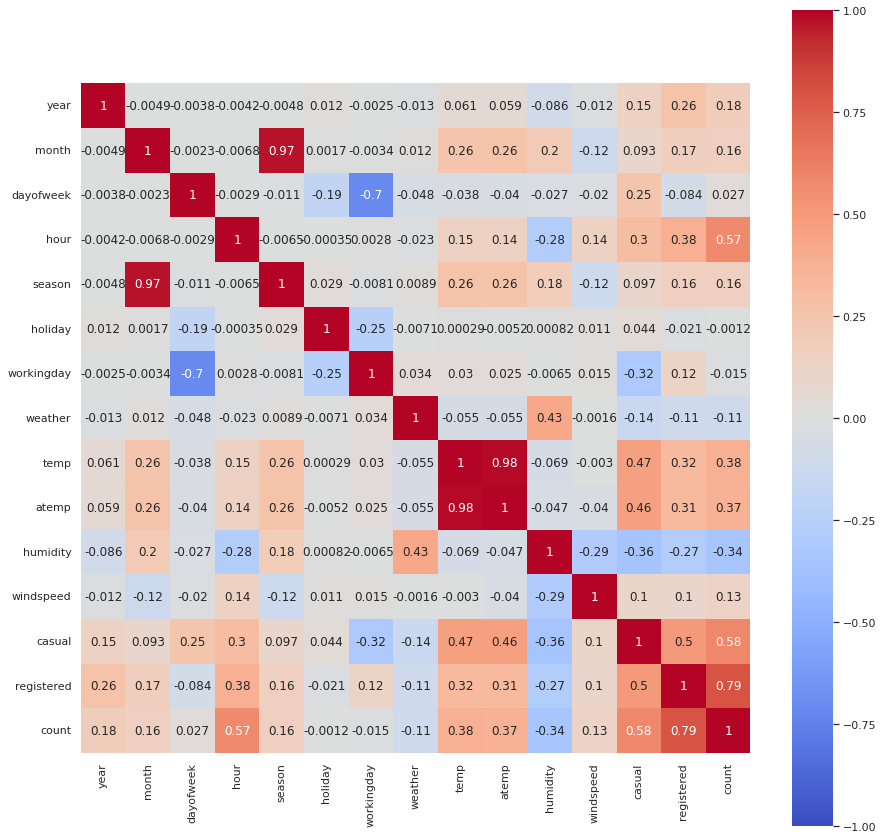

In [39]:
# Correlation between each features

plt.figure(figsize=(15,15))
sns.heatmap(train_data_ordered.corr('pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

Based on the heatmap shown above, we can draw the following conclusions:

* As expected, there is a high correlation between temp and atemp.
* Also, as expected, there is a high correlation between count and casual, as well as registered, since count is equal to the sum of casual and registered.
* We observe a positive correlation between count and temp (as indicated by the regplot), but this may only be true within the range of temperatures provided.
* Conversely, we see a negative correlation between count and humidity. This implies that people may be less likely to bike when humidity is high.
* There appears to be little correlation between humidity and temperature.
* Finally, windspeed has a weak effect on count, indicating that it has little influence on the number of people who choose to bike.

## **2.6  Feature Engineering - Part 2**

### **2.6.1 Dropping Columns (casual and registered)**

In [40]:
train_data_dropped = train_data_ordered.drop(['casual', 'registered'], axis = 1)
test_data_dropped = test_data_ordered.copy()

In [41]:
train_data_dropped.head()

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,5,0,1,0,0,1,9.84,14.395,81.0,0.0,2.833213
1,2011,1,5,1,1,0,0,1,9.02,13.635,80.0,0.0,3.713572
2,2011,1,5,2,1,0,0,1,9.02,13.635,80.0,0.0,3.496508
3,2011,1,5,3,1,0,0,1,9.84,14.395,75.0,0.0,2.639057
4,2011,1,5,4,1,0,0,1,9.84,14.395,75.0,0.0,0.693147


In [42]:
test_data_dropped.head()

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,3,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,3,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,3,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,3,4,1,0,1,1,10.66,12.880,56,11.0014


### **2.6.2 Weather Conversion**

In [43]:
train_data_dropped['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [44]:
test_data_dropped['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

In [45]:
heavy_weather_data = train_data_dropped.loc[train_data_dropped['weather'] == 4]
idx = heavy_weather_data.index.values[0]
heavy_weather_range = train_data_dropped.loc[(idx - 12 <= train_data_dropped.index) & (train_data_dropped.index <= idx + 5)]
print(heavy_weather_range)

      year  month  dayofweek  hour  season  holiday  workingday  weather  \
5619  2012      1          0     6       1        0           1        2   
5620  2012      1          0     7       1        0           1        2   
5621  2012      1          0     8       1        0           1        2   
5622  2012      1          0     9       1        0           1        2   
5623  2012      1          0    10       1        0           1        1   
5624  2012      1          0    11       1        0           1        2   
5625  2012      1          0    12       1        0           1        2   
5626  2012      1          0    13       1        0           1        2   
5627  2012      1          0    14       1        0           1        3   
5628  2012      1          0    15       1        0           1        3   
5629  2012      1          0    16       1        0           1        3   
5630  2012      1          0    17       1        0           1        3   
5631  2012  

In [46]:
train_data_dropped['weather'] = train_data_ordered['weather'].map({1:0, 2:1, 3:2, 4:2})
test_data_dropped['weather'] = test_data_ordered['weather'].map({1:0, 2:1, 3:2, 4:2})

In [47]:
train_data_dropped['weather'].value_counts()

0    7192
1    2834
2     860
Name: weather, dtype: int64

### **2.6.3 Creating Dummy Variables**

In [48]:
train_data_with_dummies = pd.get_dummies(train_data_dropped, columns=['year','month', 'dayofweek', 'hour', 'season','weather'], drop_first=True)
test_data_with_dummies = pd.get_dummies(test_data_dropped, columns=['year','month', 'dayofweek', 'hour', 'season', 'weather'], drop_first=True)
train_data_with_dummies.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2012,month_2,month_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_1,weather_2
0,0,0,9.84,14.395,81.0,0.0,2.833213,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80.0,0.0,3.713572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80.0,0.0,3.496508,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75.0,0.0,2.639057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75.0,0.0,0.693147,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **3 Modelling**

## **3.1  Scaling Numeric Values**

In [49]:
# MinMax scaling numeric values

from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['temp', 'atemp', 'humidity','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [50]:
train_data_scaled = scaling(train_data_with_dummies)
test_data_scaled = scaling(test_data_with_dummies)

In [51]:
train_data_scaled.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2012,month_2,month_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_1,weather_2
0,0,0,0.224490,0.305068,0.793478,0.0,2.833213,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.204082,0.288064,0.782609,0.0,3.713572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.204082,0.288064,0.782609,0.0,3.496508,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.224490,0.305068,0.728261,0.0,2.639057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.224490,0.305068,0.728261,0.0,0.693147,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_data_scaled.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year_2012,month_2,month_3,month_4,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_1,weather_2
0,0,1,0.25,0.2273,0.47619,0.464346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.25,0.2727,0.47619,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0.25,0.2727,0.47619,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0.25,0.2576,0.47619,0.196458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0.25,0.2576,0.47619,0.196458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **3.2  Train/Validation Split**

In [53]:
# Split Train & Validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data_scaled.drop(['count'],axis=1),train_data_scaled['count'],test_size=0.2)

## **3.3  Defining Metric**

In [54]:
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

## **3.4  Model Selection**

In [55]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [56]:
def evaluate(reg_cls,params=None):
    reg=reg_cls()
    if params:
        reg=GridSearchCV(reg,param_grid=params,refit=True)
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    
    y_test_exp=np.expm1(y_test)
    pred_exp=np.expm1(pred)
    print('\n',reg_cls)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(rmsle(y_test_exp,pred_exp))
    return reg,pred_exp

In [57]:
lr_reg,pred_lr=evaluate(LinearRegression)
rg_reg,pred_rg=evaluate(Ridge)
ls_reg,pred_ls=evaluate(Lasso)
rf_reg,pred_rf=evaluate(RandomForestRegressor)
gb_reg,pred_gb=evaluate(GradientBoostingRegressor)
xg_reg,pred_xg=evaluate(XGBRegressor)
lg_reg,pred_lg=evaluate(LGBMRegressor)

params={'n_estimators':[100*i for i in range(1,6)]}
xg_reg,pred_xg=evaluate(XGBRegressor,params)
lg_reg,pred_Ig=evaluate(LGBMRegressor,params)


 <class 'sklearn.linear_model._base.LinearRegression'>
0.5833378254459833

 <class 'sklearn.linear_model._ridge.Ridge'>
0.5831805886479768

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.4189993971688077

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.425871238322336

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.5091360701279454

 <class 'xgboost.sklearn.XGBRegressor'>
0.3660678295397579

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.3328178154829942

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 500}
0.3517956672997657

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 500}
0.3034494661517461


## **3.5  Feature Importance**

In [58]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(X_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values',y='features',data=df.sort_values(by='values',ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


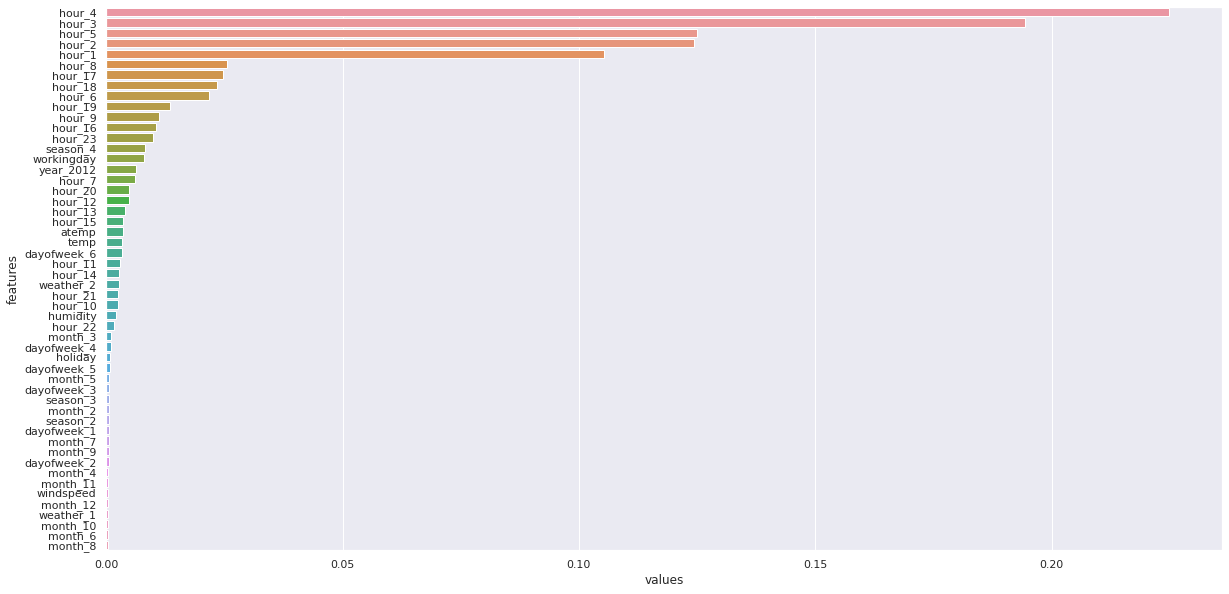

In [59]:
# XGBRegressor feature importance
feature_importance(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


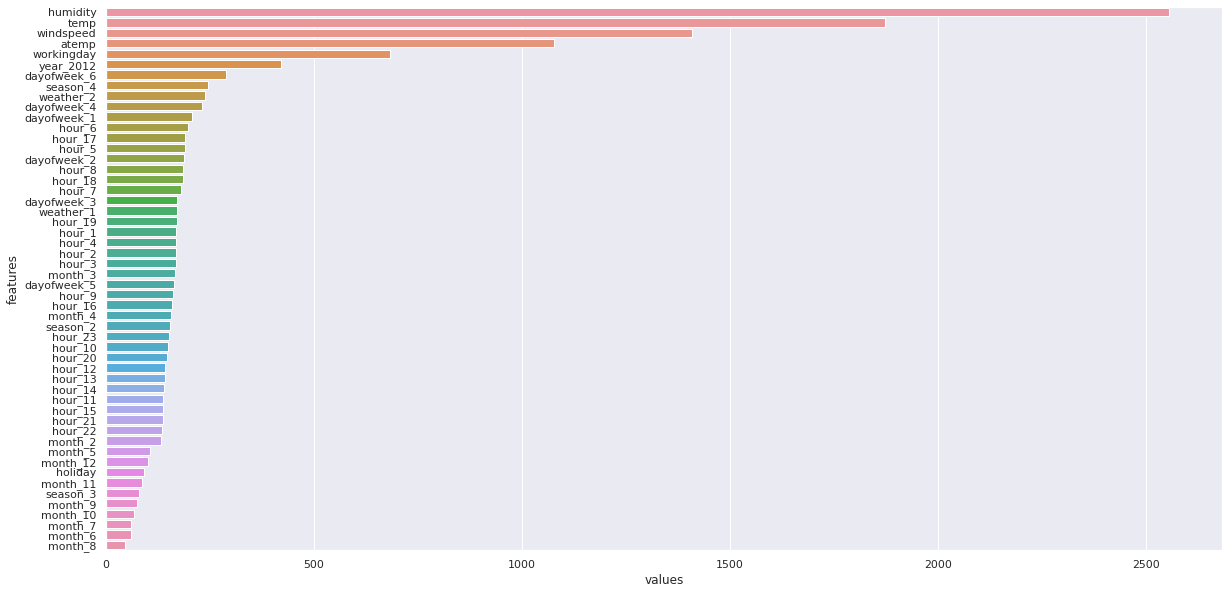

In [60]:
# LightGBMRegressor feature importance
feature_importance(lg_reg)

## **3.6  Submission**

In [61]:
submission=pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [62]:
test_data_scaled.shape

(6493, 52)

In [63]:
submission.shape

(6493, 2)

In [64]:
pred=lg_reg.predict(test_data_scaled)
pred_exp=np.expm1(pred)
print(pred_exp)

[13.91478406  3.88641563  2.98933555 ... 97.36944212 82.51683987
 40.73318456]


In [65]:
submission.loc[:,'count']=pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,13.914784
1,2011-01-20 01:00:00,3.886416
2,2011-01-20 02:00:00,2.989336
3,2011-01-20 03:00:00,2.063520
4,2011-01-20 04:00:00,2.186224
...,...,...
6488,2012-12-31 19:00:00,255.733222
6489,2012-12-31 20:00:00,156.450964
6490,2012-12-31 21:00:00,97.369442
6491,2012-12-31 22:00:00,82.516840


In [66]:
submission.to_csv('submission.csv', index=False)

# **4 Summary**

This report details the development of a model that predicts the number of bike rentals based on weather conditions and time of year using data from the Capital Bikeshare program in Washington, D.C. 

The report begins with an exploratory data analysis that includes identifying and handling missing data values and outliers, conducting correlation analysis to select relevant features, and performing feature engineering. 

The report then compares several popular individual models, including Linear Regressor, Ridge and Lasso Regularization Models, Random Forest, Gradient Boost, XGBRegressor and LGBMRegressor. 

The provided labeled data set consists of the first 19 days of each month, while the Kaggle Test Data includes rental information from the 20th until the end of the month. Out of all the models tested, LGBMRegressor was found to be the most suitable choice, achieving a test scores of 0.29.The model yielded a score of 0.39 on Kaggle Test Data.

## **4.1 Data Exploration Conclusions**

In this project, we investigated various factors that affect the bike rental count. Here's a brief overview of our exploratory data analysis:

**Working vs Non-working Day:** We observed two distinct rental patterns based on whether it was a working day or not. On a working day, rental count was highest during peak office hours (8am and 5pm), while on a non-working day, the rental count was relatively uniform throughout the day, with a peak around noon.

**Hour of the Day:** Bike rental count was strongly correlated with the time of day. As mentioned earlier, the count peaked during working hours and remained relatively consistent during non-working hours.

**Casual vs Registered Users:** Casual users, likely tourists, had higher rental counts during non-working days, while registered users, mainly city natives, had higher rental counts during working days.

**Temperature:** Moderate to high temperatures were preferred for biking, with the highest rental counts observed between 32 to 36 degrees Celsius.

**Season:** Bike rentals were highest during the Fall (July to September) and Summer (April to June) seasons, and lowest during the Spring (January to March) season.

**Weather:** As expected, the highest number of bike rentals occurred on clear days, and the lowest during snowy or rainy days.

**Humidity:** We observed a decrease in the number of bike rentals as humidity increased.

## **4.2 Limitations and Scope for Future Work**

Here are some limitations of our analysis and ideas to enhance the prediction accuracy of our model:


* In this analysis, we only predicted the total bike rental count by disregarding the information about casual and registered users. A potential improvement could be to develop separate models for these user groups and combine their predictions.

* A limitation of the provided training data set was the absence of data on extreme weather conditions (weather = 4), which compelled us to adjust it to weather = 3.

* There are several instances where windspeed = 0. One possible method could be to first estimate those windspeed and then use it as a feature to estimate count.